In [1]:
import h5py
import pandas
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree,export_graphviz
import pandas as pd
import graphviz
from IPython.display import SVG
from graphviz import Source
from sklearn import tree
from ipywidgets import interactive
from IPython.display import display
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import auc, accuracy_score, mean_squared_error
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error
import lightgbm as lgb
from lightgbm import early_stopping
from functions import *
import optuna
import time

In [2]:
r = np.random
r.seed(42)

SavePlots = False
plt.close('all')

Shape of training data set: (162500, 166)
Shape of test data set: (160651, 164)


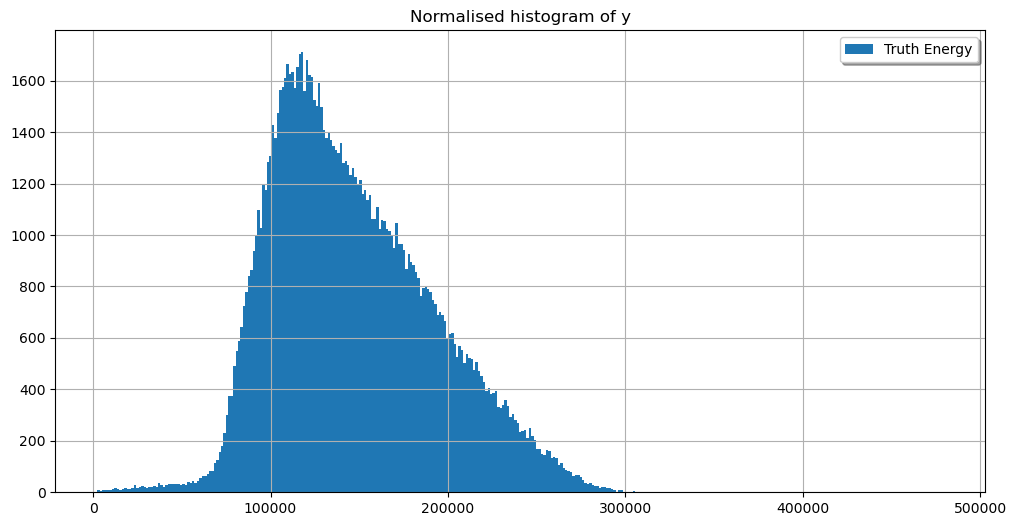

Shape of X: (162500, 160)
Shape of y: (162500,)


In [3]:
def load_data(name):
    with h5py.File(f'{name}.h5', 'r') as f:
        filename = name.split('/')[1]
        return pandas.DataFrame(f[filename][:], dtype=np.float64)

train = load_data('data/train')
test  = load_data('data/test')

print (f'Shape of training data set: {train.shape}')
print (f'Shape of test data set: {test.shape}')

all_variables = ['actualInteractionsPerCrossing', 'averageInteractionsPerCrossing', 'correctedActualMu', 'correctedAverageMu', 'correctedScaledActualMu',
                 'correctedScaledAverageMu', 'NvtxReco', 'p_nTracks', 'p_pt_track', 'p_eta', 'p_phi', 'p_charge', 'p_qOverP', 'p_z0', 'p_d0', 'p_sigmad0',
                 'p_d0Sig', 'p_EptRatio', 'p_dPOverP', 'p_z0theta', 'p_etaCluster', 'p_phiCluster', 'p_eCluster', 'p_rawEtaCluster', 'p_rawPhiCluster',
                 'p_rawECluster', 'p_eClusterLr0', 'p_eClusterLr1', 'p_eClusterLr2', 'p_eClusterLr3', 'p_etaClusterLr1', 'p_etaClusterLr2', 'p_phiClusterLr2',
                 'p_eAccCluster', 'p_f0Cluster', 'p_etaCalo', 'p_phiCalo', 'p_eTileGap3Cluster', 'p_cellIndexCluster', 'p_phiModCalo', 'p_etaModCalo', 'p_dPhiTH3',
                 'p_R12', 'p_fTG3', 'p_weta2', 'p_Reta', 'p_Rphi', 'p_Eratio', 'p_f1', 'p_f3', 'p_Rhad', 'p_Rhad1', 'p_deltaEta1', 'p_deltaPhiRescaled2',
                 'p_TRTPID', 'p_TRTTrackOccupancy', 'p_numberOfInnermostPixelHits', 'p_numberOfPixelHits', 'p_numberOfSCTHits', 'p_numberOfTRTHits',
                 'p_numberOfTRTXenonHits', 'p_chi2', 'p_ndof', 'p_SharedMuonTrack', 'p_E7x7_Lr2', 'p_E7x7_Lr3', 'p_E_Lr0_HiG', 'p_E_Lr0_LowG', 'p_E_Lr0_MedG',
                 'p_E_Lr1_HiG', 'p_E_Lr1_LowG', 'p_E_Lr1_MedG', 'p_E_Lr2_HiG', 'p_E_Lr2_LowG', 'p_E_Lr2_MedG', 'p_E_Lr3_HiG', 'p_E_Lr3_LowG', 'p_E_Lr3_MedG',
                 'p_ambiguityType', 'p_asy1', 'p_author', 'p_barys1', 'p_core57cellsEnergyCorrection', 'p_deltaEta0', 'p_deltaEta2', 'p_deltaEta3', 'p_deltaPhi0',
                 'p_deltaPhi1', 'p_deltaPhi2', 'p_deltaPhi3', 'p_deltaPhiFromLastMeasurement', 'p_deltaPhiRescaled0', 'p_deltaPhiRescaled1', 'p_deltaPhiRescaled3',
                 'p_e1152', 'p_e132', 'p_e235', 'p_e255', 'p_e2ts1', 'p_ecore', 'p_emins1', 'p_etconeCorrBitset', 'p_ethad', 'p_ethad1', 'p_f1core', 'p_f3core',
                 'p_maxEcell_energy', 'p_maxEcell_gain', 'p_maxEcell_time', 'p_maxEcell_x', 'p_maxEcell_y', 'p_maxEcell_z', 'p_nCells_Lr0_HiG', 'p_nCells_Lr0_LowG',
                 'p_nCells_Lr0_MedG', 'p_nCells_Lr1_HiG', 'p_nCells_Lr1_LowG', 'p_nCells_Lr1_MedG', 'p_nCells_Lr2_HiG', 'p_nCells_Lr2_LowG', 'p_nCells_Lr2_MedG',
                 'p_nCells_Lr3_HiG', 'p_nCells_Lr3_LowG', 'p_nCells_Lr3_MedG', 'p_pos', 'p_pos7', 'p_poscs1', 'p_poscs2', 'p_ptconeCorrBitset',
                 'p_ptconecoreTrackPtrCorrection', 'p_r33over37allcalo', 'p_topoetconeCorrBitset', 'p_topoetconecoreConeEnergyCorrection',
                 'p_topoetconecoreConeSCEnergyCorrection', 'p_weta1', 'p_widths1', 'p_widths2', 'p_wtots1', 'p_e233', 'p_e237', 'p_e277', 'p_e2tsts1', 'p_ehad1',
                 'p_emaxs1', 'p_fracs1', 'p_DeltaE', 'p_E3x5_Lr0', 'p_E3x5_Lr1', 'p_E3x5_Lr2', 'p_E3x5_Lr3', 'p_E5x7_Lr0', 'p_E5x7_Lr1', 'p_E5x7_Lr2', 'p_E5x7_Lr3',
                 'p_E7x11_Lr0', 'p_E7x11_Lr1', 'p_E7x11_Lr2', 'p_E7x11_Lr3', 'p_E7x7_Lr0', 'p_E7x7_Lr1' ]

electron_variable_list = ['actualInteractionsPerCrossing',
'averageInteractionsPerCrossing',
'correctedActualMu',
'correctedAverageMu',
'correctedScaledActualMu',
'correctedScaledAverageMu',
'NvtxReco',
'p_nTracks',
'p_pt_track',
'p_eta',
'p_phi',
'p_charge',
'p_qOverP',
'p_z0',
'p_d0',
'p_sigmad0',
'p_d0Sig',
'p_EptRatio',
'p_dPOverP',
'p_z0theta',
'p_etaCluster',
'p_phiCluster',
'p_eCluster',
'p_rawEtaCluster',
'p_rawPhiCluster',
'p_rawECluster',
'p_eClusterLr0',
'p_eClusterLr1',
'p_eClusterLr2',
'p_eClusterLr3',
'p_etaClusterLr1',
'p_etaClusterLr2',
'p_phiClusterLr2',
'p_eAccCluster',
'p_f0Cluster',
'p_etaCalo',
'p_phiCalo',
'p_eTileGap3Cluster',
'p_cellIndexCluster',
'p_phiModCalo',
'p_etaModCalo',
'p_dPhiTH3',
'p_R12',
'p_fTG3',
'p_weta2',
'p_Reta',
'p_Rphi',
'p_Eratio',
'p_f1',
'p_f3',
'p_Rhad',
'p_Rhad1',
'p_deltaEta1',
'p_deltaPhiRescaled2',
'p_TRTPID',
'p_TRTTrackOccupancy',
'p_numberOfInnermostPixelHits',
'p_numberOfPixelHits',
'p_numberOfSCTHits',
'p_numberOfTRTHits',
'p_numberOfTRTXenonHits',
'p_chi2',
'p_ndof',
'p_SharedMuonTrack',
'p_E7x7_Lr2',
'p_E7x7_Lr3',
'p_E_Lr0_HiG',
'p_E_Lr0_LowG',
'p_E_Lr0_MedG',
'p_E_Lr1_HiG',
'p_E_Lr1_LowG',
'p_E_Lr1_MedG',
'p_E_Lr2_HiG',
'p_E_Lr2_LowG',
'p_E_Lr2_MedG',
'p_E_Lr3_HiG',
'p_E_Lr3_LowG',
'p_E_Lr3_MedG',
'p_ambiguityType',
'p_asy1',
'p_author',
'p_barys1',
'p_core57cellsEnergyCorrection',
'p_deltaEta0',
'p_deltaEta2',
'p_deltaEta3',
'p_deltaPhi0',
'p_deltaPhi1',
'p_deltaPhi2',
'p_deltaPhi3',
'p_deltaPhiFromLastMeasurement',
'p_deltaPhiRescaled0',
'p_deltaPhiRescaled1',
'p_deltaPhiRescaled3',
'p_e1152',
'p_e132',
'p_e235',
'p_e255',
'p_e2ts1',
'p_ecore',
'p_emins1',
'p_etconeCorrBitset',
'p_ethad',
'p_ethad1',
'p_f1core',
'p_f3core',
'p_maxEcell_energy',
'p_maxEcell_gain',
'p_maxEcell_time',
'p_maxEcell_x',
'p_maxEcell_y',
'p_maxEcell_z',
'p_nCells_Lr0_HiG',
'p_nCells_Lr0_LowG',
'p_nCells_Lr0_MedG',
'p_nCells_Lr1_HiG',
'p_nCells_Lr1_LowG',
'p_nCells_Lr1_MedG',
'p_nCells_Lr2_HiG',
'p_nCells_Lr2_LowG',
'p_nCells_Lr2_MedG',
'p_nCells_Lr3_HiG',
'p_nCells_Lr3_LowG',
'p_nCells_Lr3_MedG',
'p_pos',
'p_pos7',
'p_poscs1',
'p_poscs2',
'p_ptconeCorrBitset',
'p_ptconecoreTrackPtrCorrection',
'p_r33over37allcalo',
'p_topoetconeCorrBitset',
'p_topoetconecoreConeEnergyCorrection',
'p_topoetconecoreConeSCEnergyCorrection',
'p_weta1',
'p_widths1',
'p_widths2',
'p_wtots1',
'p_e233',
'p_e237',
'p_e277',
'p_e2tsts1',
'p_ehad1',
'p_emaxs1',
'p_fracs1',
'p_DeltaE',
'p_E3x5_Lr0',
'p_E3x5_Lr1',
'p_E3x5_Lr2',
'p_E3x5_Lr3',
'p_E5x7_Lr0',
'p_E5x7_Lr1',
'p_E5x7_Lr2',
'p_E5x7_Lr3',
'p_E7x11_Lr0',
'p_E7x11_Lr1',
'p_E7x11_Lr2',
'p_E7x11_Lr3',
'p_E7x7_Lr0',
'p_E7x7_Lr1']

X_init = train[electron_variable_list]
X = pd.DataFrame(preprocessing.normalize(X_init), columns = electron_variable_list)
y_init = train['p_truth_E']

y = (y_init - y_init.mean())/y_init.std()

X_electron = X_init[train['Truth'] == 1]
y_electron = y_init[train['Truth'] == 1]

#y = pd.Series(preprocessing.normalize(y_init.values))

plt.figure(figsize=(12, 6))
plt.hist(y_electron, label="Truth Energy", bins = round(np.sqrt(len(y_electron))))
plt.title("Normalised histogram of y")
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()  



print (f'Shape of X: {X.shape}')
print (f'Shape of y: {y.shape}')


## Setting up Optuna to optimise the hyper-parameters

In [4]:
"""
Optuna example that demonstrates a pruner for LightGBM.

In this example, we optimize the validation accuracy of cancer detection using LightGBM.
We optimize both the choice of booster model and their hyperparameters. Throughout
training of models, a pruner observes intermediate results and stop unpromising trials.

You can run this example as follows:
    $ python lightgbm_integration.py

"""


# FYI: Objective functions can take additional arguments
# (https://optuna.readthedocs.io/en/stable/faq.html#objective-func-additional-args).
def objective_1(trial):

    train_x, valid_x, train_y, valid_y = train_test_split(X_electron, y_electron, test_size=0.25)
    dtrain = lgb.Dataset(train_x, label=train_y)
    dvalid = lgb.Dataset(valid_x, label=valid_y)

    param = {
        'objective': 'regression',
        'metric': 'rmse',
        "boosting_type": "gbdt",
        "verbosity": -1,
        "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
        "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 2, 256),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
        "min_child_samples": trial.suggest_int("min_child_samples", 3, 100),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0),
        'random_state': trial.suggest_int('random_state', 1, 1000),
    }

    # Add a callback for pruning.
    pruning_callback = optuna.integration.LightGBMPruningCallback(trial, "rmse")
    lgm = lgb.train(param, dtrain, valid_sets=[dvalid], callbacks=[pruning_callback])

    preds = lgm.predict(valid_x)
    pred_labels = np.rint(preds)
    accuracy = mean_squared_error(valid_y, pred_labels)
    return accuracy


optuna_1 = True

if optuna_1:
    study = optuna.create_study(
        pruner=optuna.pruners.MedianPruner(n_warmup_steps=10), direction="minimize"
    )
    study.optimize(objective_1, n_trials=100)

    print("Number of finished trials: {}".format(len(study.trials)))

    print("Best trial:")
    trial = study.best_trial

    print("  Value: {}".format(trial.value))

    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))

[I 2023-05-18 08:14:57,393] A new study created in memory with name: no-name-8e83f555-5cce-4337-948c-1d7f6137a5e1
[I 2023-05-18 08:15:10,612] Trial 0 finished with value: 490066258.8963895 and parameters: {'lambda_l1': 7.083195294620662e-07, 'lambda_l2': 1.1515156134014528e-05, 'num_leaves': 225, 'feature_fraction': 0.47128099597764606, 'bagging_fraction': 0.4288371444203216, 'bagging_freq': 5, 'min_child_samples': 69, 'learning_rate': 0.7607117346210477, 'random_state': 364}. Best is trial 0 with value: 490066258.8963895.
[I 2023-05-18 08:15:12,951] Trial 1 finished with value: 204112400.07279518 and parameters: {'lambda_l1': 9.987024818391751e-06, 'lambda_l2': 2.473834052655565e-05, 'num_leaves': 27, 'feature_fraction': 0.5750781522299564, 'bagging_fraction': 0.4177638163576927, 'bagging_freq': 6, 'min_child_samples': 88, 'learning_rate': 0.571512688155948, 'random_state': 628}. Best is trial 1 with value: 204112400.07279518.
[I 2023-05-18 08:15:16,805] Trial 2 finished with value: 2

Number of finished trials: 100
Best trial:
  Value: 157287500.0013707
  Params: 
    lambda_l1: 1.1064904865917004e-08
    lambda_l2: 0.013009507757245298
    num_leaves: 173
    feature_fraction: 0.9455652127322908
    bagging_fraction: 0.9713656799548795
    bagging_freq: 3
    min_child_samples: 61
    learning_rate: 0.2294834201070184
    random_state: 80


In [8]:
start=time.time()

# Split data set into training and test set and feed these to LightGBM:
# We choose a 75:25 division here. Dataset is shuffeled before the split. 
# By using a number (42), it creates a random seed so you can rerun and obtain the same result.
input_train, input_test, truth_train, truth_test = train_test_split(X_electron, y_electron, test_size=0.25, random_state=42)
lgb_train = lgb.Dataset(input_train, truth_train)
lgb_eval  = lgb.Dataset(input_test,  truth_test, reference=lgb_train)
params = {
    'boosting_type': 'gbdt', # Traditional Gradient Boosting tree, we are combining many 'weak' learners here!
    'objective': 'regression',   # The outcome is binary, b-quark or not
    'verbose':-1,            # Suppress some output
    'lambda_l1': '1.1064904865917004e-08',
    'lambda_l2': '0.013009507757245298',
    'num_leaves': '173',
    'feature_fraction': '0.9455652127322908',
    'bagging_fraction': '0.9713656799548795',
    'bagging_freq': '3',
    'min_child_samples': '61',
    'learning_rate': '0.2294834201070184',
    'random_state': '80',
}

# Train the model:
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=1000,
                valid_sets=lgb_eval,
                callbacks=[early_stopping(20)])     # Stops if no improvement is seen in N rounds.

# Make predictions:
y_score = gbm.predict(input_test, num_iteration=gbm.best_iteration)  


# Print the time usage:
end = time.time()
print(f"Time used by LightGBM: {(end-start):.1f} s")

Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[48]	valid_0's l2: 1.72571e+08
Time used by LightGBM: 6.9 s


['p_Reta' 'p_nTracks' 'p_DeltaE' 'p_deltaPhiFromLastMeasurement'
 'p_ptconecoreTrackPtrCorrection' 'p_d0Sig' 'p_deltaPhi1' 'p_sigmad0'
 'p_Rphi' 'p_nCells_Lr2_HiG' 'p_nCells_Lr1_HiG' 'p_d0' 'p_pt_track'
 'p_qOverP' 'p_deltaPhi2' 'p_deltaEta1' 'p_eCluster' 'p_deltaPhiRescaled2'
 'p_deltaEta2' 'p_EptRatio']


<Axes: title={'center': 'Feature importance'}, xlabel='Feature Importance score', ylabel='Features'>

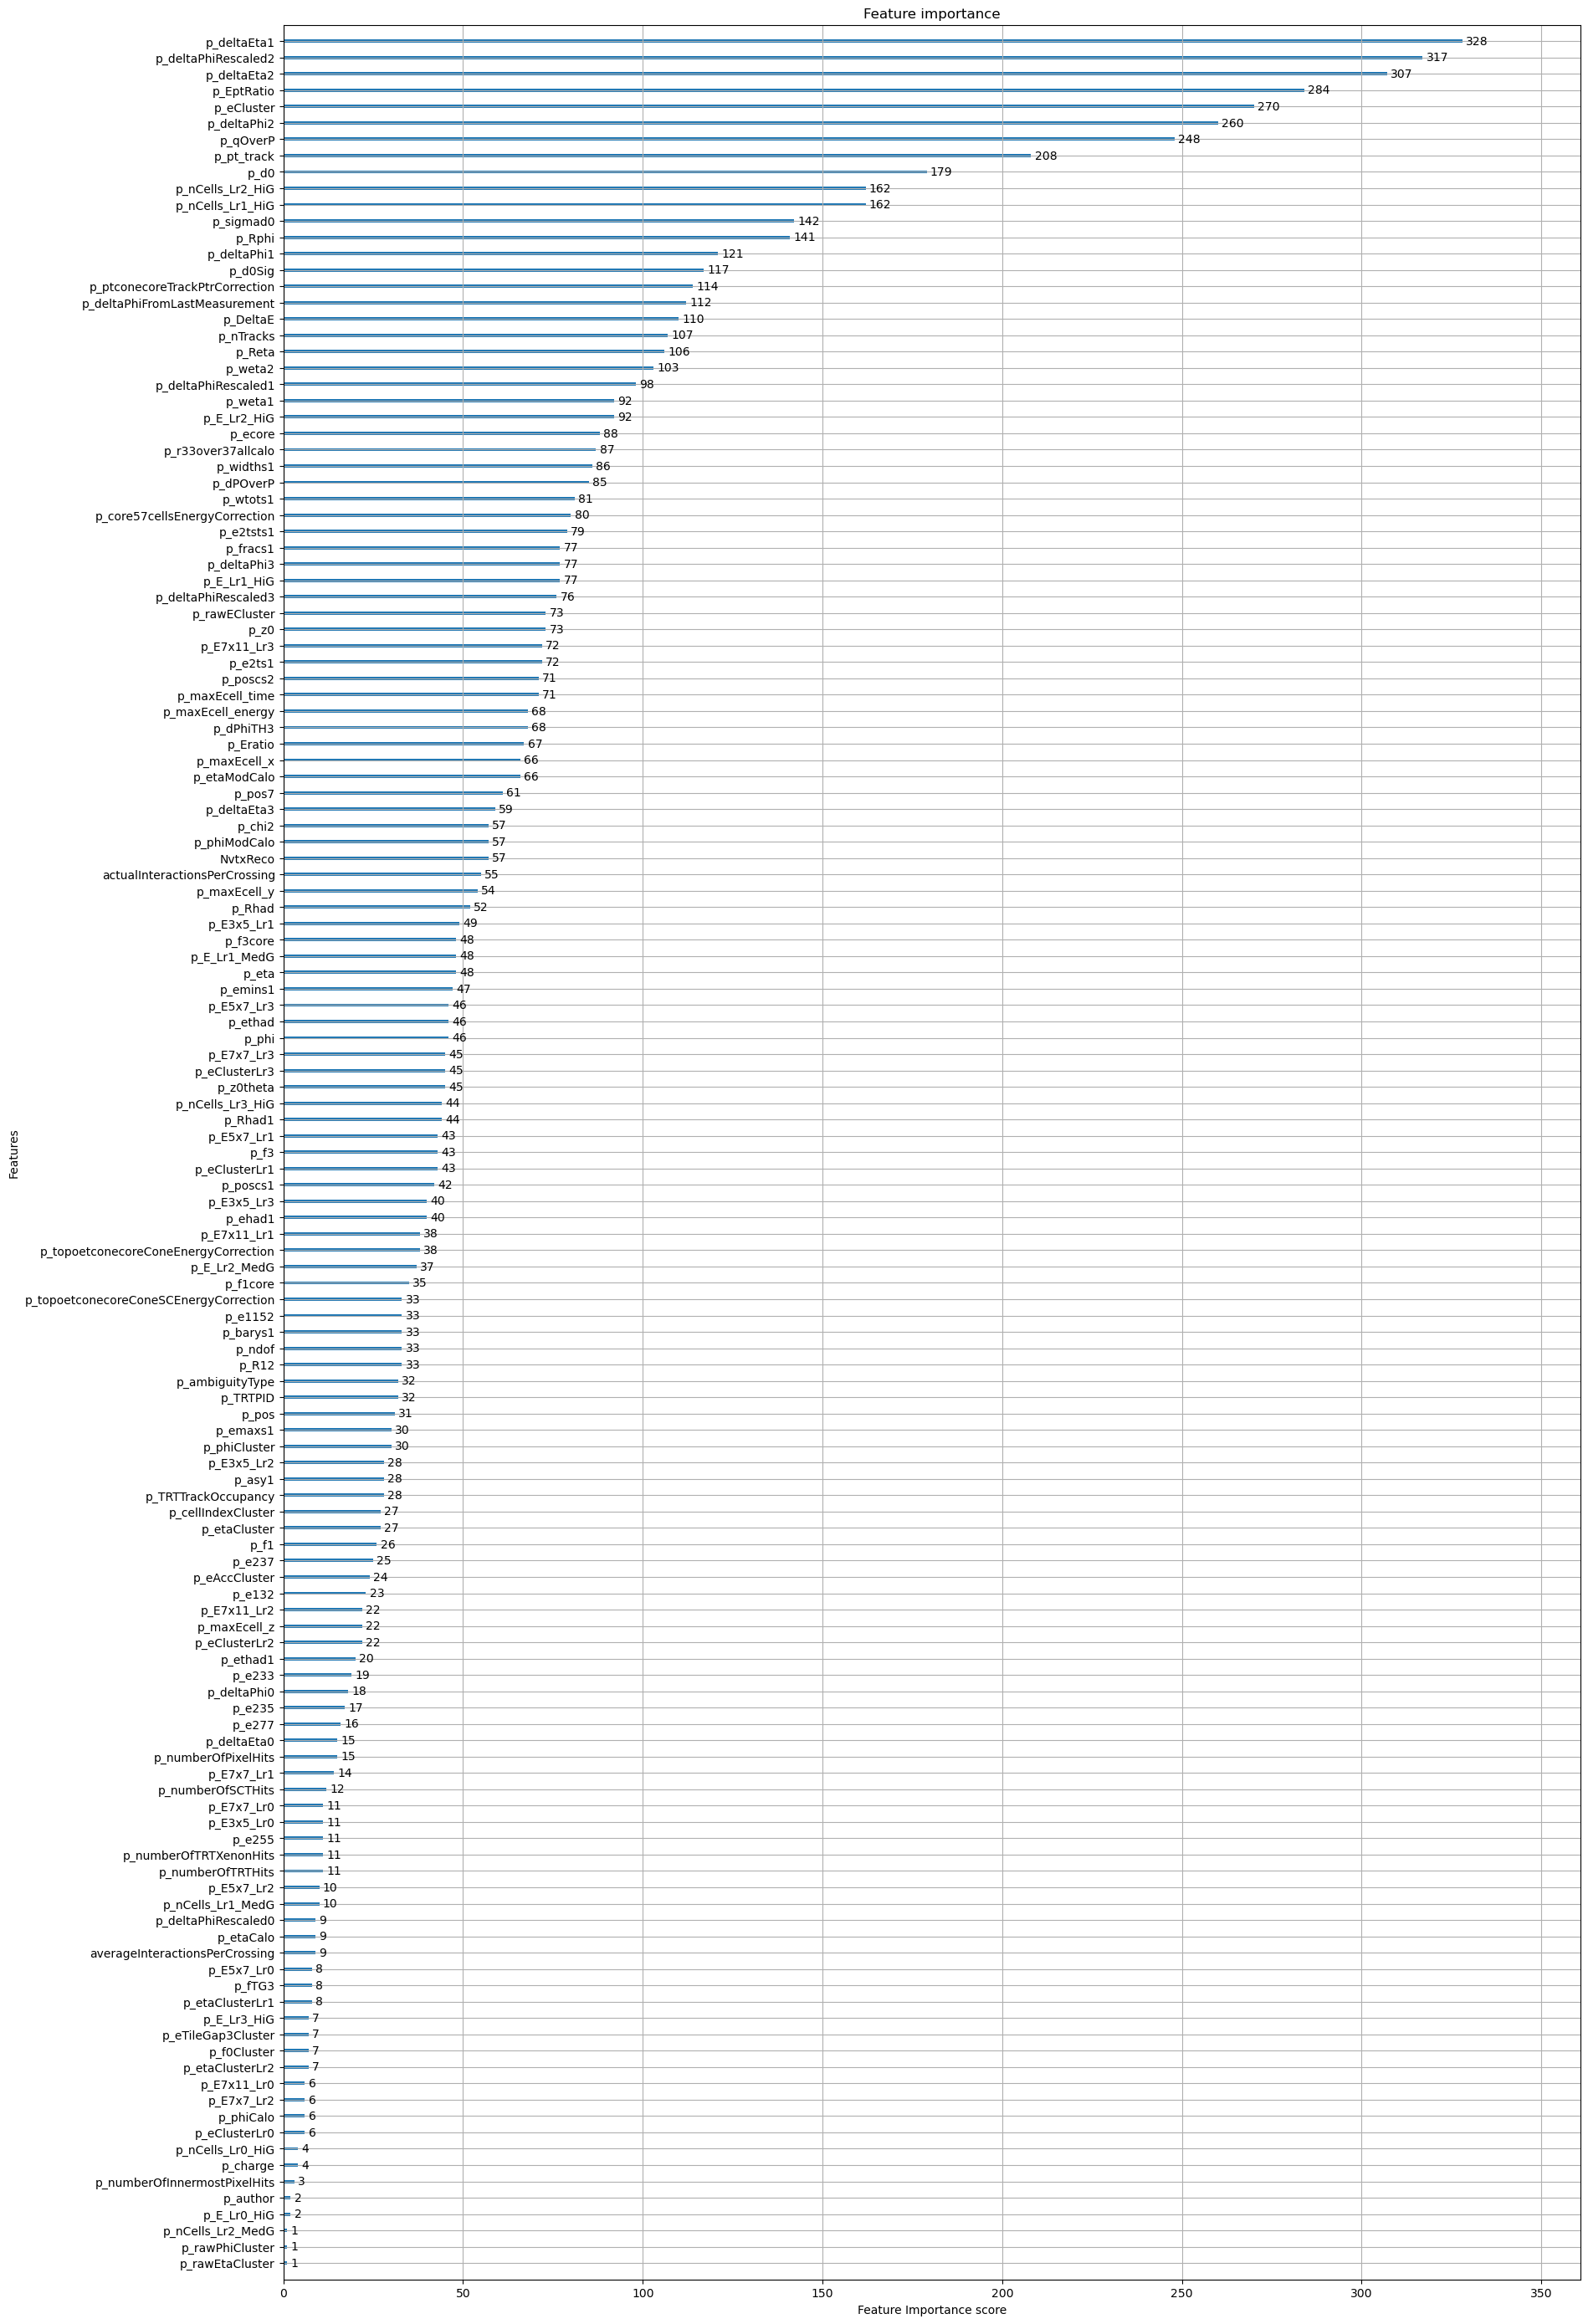

In [9]:
important_features = gbm.feature_importance()

important_features_index = np.argpartition(important_features, -20)[-20:]

gbm_trimmed_variables = np.asarray(electron_variable_list)[important_features_index]

print(gbm_trimmed_variables)

X_gbm_trimmed = X_electron[gbm_trimmed_variables]

lgb.plot_importance(gbm, grid = True, title = "Feature importance", xlabel = "Feature Importance score", ylabel = "Features", figsize = (20, 35))

## Visualise the first full-parameter model's results:

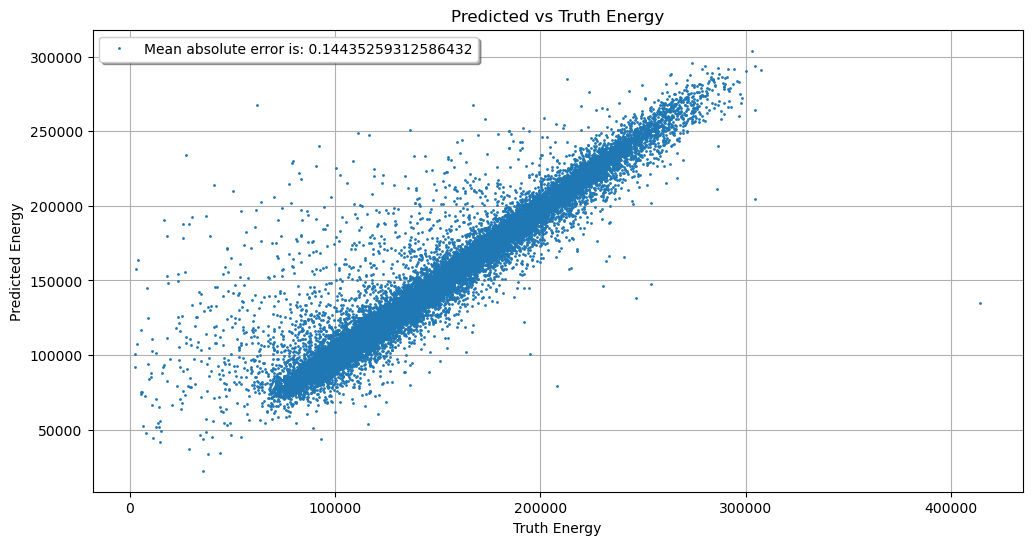

Mean absolute error is: 0.14435259312586432


In [14]:
# visualizing in a plot

plt.figure(figsize=(12, 6))
plt.plot(truth_test, y_score, label = f'Mean absolute error is: {mean_absolute_error(truth_test, y_score)/y_electron.std()}',  linestyle = "None", marker = '.', markersize = 2)
plt.title("Predicted vs Truth Energy")
plt.xlabel('Truth Energy')
plt.ylabel('Predicted Energy')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()  

print(f'Mean absolute error is: {mean_absolute_error(truth_test, y_score)/y_electron.std()}')

## Setting up second hyper-parameter optimisation

In [11]:
def objective_2(trial):

    train_x, valid_x, train_y, valid_y = train_test_split(X_gbm_trimmed, y_electron, test_size=0.25)
    dtrain = lgb.Dataset(train_x, label=train_y)
    dvalid = lgb.Dataset(valid_x, label=valid_y)

    param = {
        'objective': 'regression',
        'metric': 'rmse',
        "boosting_type": "gbdt",
        "verbosity": -1,
        "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
        "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 2, 256),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
        "min_child_samples": trial.suggest_int("min_child_samples", 3, 100),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0),
        'random_state': trial.suggest_int('random_state', 1, 1000),
    }

    # Add a callback for pruning.
    pruning_callback = optuna.integration.LightGBMPruningCallback(trial, "rmse")
    gbm = lgb.train(param, dtrain, valid_sets=[dvalid], callbacks=[pruning_callback])

    preds = gbm.predict(valid_x)
    pred_labels = np.rint(preds)
    accuracy = mean_squared_error(valid_y, pred_labels)
    return accuracy

optuna_2 = True

if optuna_2:
    study = optuna.create_study(
        pruner=optuna.pruners.MedianPruner(n_warmup_steps=10), direction="minimize"
    )
    study.optimize(objective_2, n_trials=100)

    print("Number of finished trials: {}".format(len(study.trials)))

    print("Best trial:")
    trial = study.best_trial

    print("  Value: {}".format(trial.value))

    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))


[I 2023-05-18 08:32:36,705] A new study created in memory with name: no-name-815c7ac2-d0fc-438f-bb2f-cdbc2a4bec10
[I 2023-05-18 08:32:41,356] Trial 0 finished with value: 232699207.09258747 and parameters: {'lambda_l1': 5.415126318651857e-08, 'lambda_l2': 0.33481467844785884, 'num_leaves': 182, 'feature_fraction': 0.541666703925013, 'bagging_fraction': 0.8275460911455854, 'bagging_freq': 6, 'min_child_samples': 38, 'learning_rate': 0.4535245407263136, 'random_state': 790}. Best is trial 0 with value: 232699207.09258747.
[I 2023-05-18 08:32:44,629] Trial 1 finished with value: 205207142.06561172 and parameters: {'lambda_l1': 0.4504479248227288, 'lambda_l2': 0.15602965347645378, 'num_leaves': 92, 'feature_fraction': 0.43046843533105383, 'bagging_fraction': 0.9595632367216317, 'bagging_freq': 1, 'min_child_samples': 43, 'learning_rate': 0.6917108562256833, 'random_state': 395}. Best is trial 1 with value: 205207142.06561172.
[I 2023-05-18 08:32:45,976] Trial 2 finished with value: 2133728

Number of finished trials: 100
Best trial:
  Value: 153792244.0198621
  Params: 
    lambda_l1: 2.897218994703606e-06
    lambda_l2: 1.6462684884667507
    num_leaves: 39
    feature_fraction: 0.8544392624279704
    bagging_fraction: 0.8600906925883868
    bagging_freq: 3
    min_child_samples: 84
    learning_rate: 0.3382305670507668
    random_state: 755


In [12]:
start_1 = time.time()

# Split data set into training and test set and feed these to LightGBM:
# We choose a 75:25 division here. Dataset is shuffeled before the split. 
# By using a number (42), it creates a random seed so you can rerun and obtain the same result.
input_train_opt, input_test_opt, truth_train_opt, truth_test_opt = train_test_split(X_gbm_trimmed, y_electron, test_size=0.25, random_state=42)
lgb_train_opt = lgb.Dataset(input_train_opt, truth_train_opt)
lgb_eval_opt  = lgb.Dataset(input_test_opt,  truth_test_opt, reference=lgb_train_opt)
params_opt = {
    'boosting_type': 'gbdt', # Traditional Gradient Boosting tree, we are combining many 'weak' learners here!
    'objective': 'regression',   # The outcome is binary, electron or not
    'verbose':-1,            # Suppress some output
    'lambda_l1': '2.897218994703606e-06',
    'lambda_l2': '1.6462684884667507',
    'num_leaves': '39',
    'feature_fraction': '0.8544392624279704',
    'bagging_fraction': '0.8600906925883868',
    'bagging_freq': '3',
    'min_child_samples': '84',
    'learning_rate': '0.3382305670507668',
    'random_state': '755',
}

# Train the model:
gbm_opt = lgb.train(params_opt,
                lgb_train_opt,
                num_boost_round=1000,
                valid_sets=lgb_eval_opt,
                callbacks=[early_stopping(20)])     # Stops if no improvement is seen in N rounds.

# Make predictions:
y_score_opt = gbm_opt.predict(input_test_opt, num_iteration=gbm.best_iteration)  # 


# Print the time usage:
end_1 = time.time()
print(f"Time used by LightGBM: {(end_1-start_1):.1f} s")

Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[43]	valid_0's l2: 1.68638e+08
Time used by LightGBM: 1.3 s


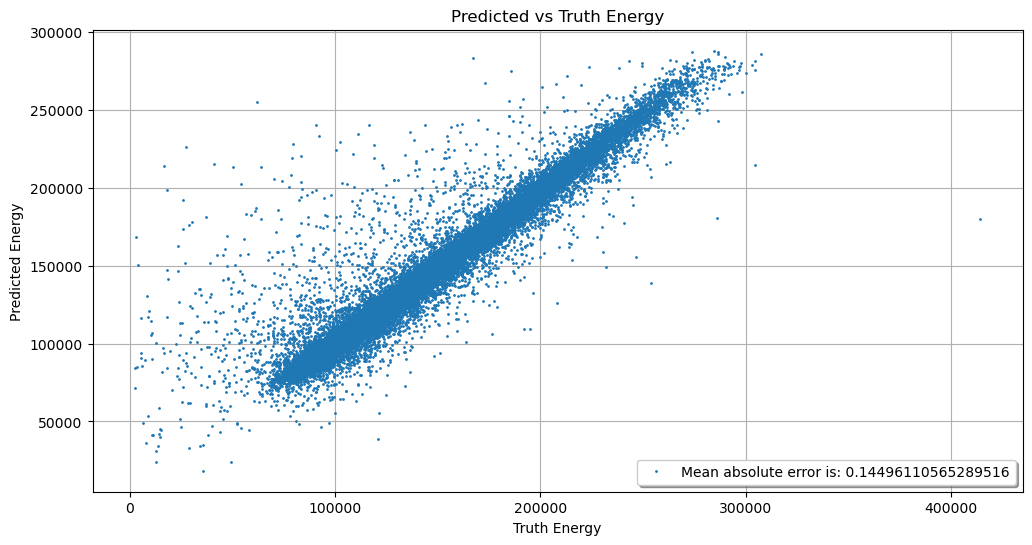

Mean absolute error is: 0.14496110565289516


In [13]:


# visualizing in a plot

plt.figure(figsize=(12, 6))
plt.plot(truth_test_opt, y_score_opt, label = f'Mean absolute error is: {mean_absolute_error(truth_test_opt, y_score_opt)/y_electron.std()}',  linestyle = "None", marker = '.', markersize = 2)
plt.title("Predicted vs Truth Energy")
plt.xlabel('Truth Energy')
plt.ylabel('Predicted Energy')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()  

print(f'Mean absolute error is: {mean_absolute_error(truth_test_opt, y_score_opt)/y_electron.std()}')